# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


## Dataset Description

### I have chosen to work with the Soccer Database, particularly because of my keen interest in football. The database contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

### We have multiple tables in this database, and I will be combining the Player and Player attributes tables to make data explorations and conclusions to make further analysis.

## Questions for analysis


#### 1. How does the vision attribute of a creative playmaker correlate with his other playmaking attributes dribbling, free_kick_accuracy, long passing, and short passing? (A creative playmaker is known for their vision, long_passing, dribbling, short passing and freekick accuracy)
#### 2. Are the attributes heading accuracy, shot power, long shots and volleys related to the finishing of a player?

#### 3. Is the overall rating of all the players normally distributed?

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
pl = pd.read_csv('Database_Soccer/Player.csv')
pa = pd.read_csv('Database_Soccer/Player_Attributes.csv')

pa.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
pl.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


### Looking through the available columns, and also looking for missing data values

In [4]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB



### Data Cleaning
 

## Combining Player datafile with Player Attributes datafile and removing columns irrelevant to the questions for our analysis

In [6]:
pl_combined = pl.merge(pa, left_on='player_api_id', right_on='player_api_id', how='inner')

pl_combined.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
pl_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
id_x                    183978 non-null int64
player_api_id           183978 non-null int64
player_name             183978 non-null object
player_fifa_api_id_x    183978 non-null int64
birthday                183978 non-null object
height                  183978 non-null float64
weight                  183978 non-null int64
id_y                    183978 non-null int64
player_fifa_api_id_y    183978 non-null int64
date                    183978 non-null object
overall_rating          183142 non-null float64
potential               183142 non-null float64
preferred_foot          183142 non-null object
attacking_work_rate     180748 non-null object
defensive_work_rate     183142 non-null object
crossing                183142 non-null float64
finishing               183142 non-null float64
heading_accuracy        183142 non-null float64
short_passing           183142 non-null flo

### Removing columns irrelevant to our questions. Out of the 48 columns, I only need 12 columns to carry out my analysis. So, I am selecting those 12, instead of trying to drop 36 columns, which will be more strenuous.

In [8]:
pl_sieved = pl_combined[['player_name', 'overall_rating', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'free_kick_accuracy', 'long_passing', 'shot_power', 'long_shots', 'vision']].copy()

pl_sieved.head()

,player_name,overall_rating,finishing,heading_accuracy,short_passing,volleys,dribbling,free_kick_accuracy,long_passing,shot_power,long_shots,vision
0,Aaron Appindangoye,67.0,44.0,71.0,61.0,44.0,51.0,39.0,64.0,55.0,35.0,54.0
1,Aaron Appindangoye,67.0,44.0,71.0,61.0,44.0,51.0,39.0,64.0,55.0,35.0,54.0
2,Aaron Appindangoye,62.0,44.0,71.0,61.0,44.0,51.0,39.0,64.0,55.0,35.0,54.0
3,Aaron Appindangoye,61.0,43.0,70.0,60.0,43.0,50.0,38.0,63.0,54.0,34.0,53.0
4,Aaron Appindangoye,61.0,43.0,70.0,60.0,43.0,50.0,38.0,63.0,54.0,34.0,53.0


In [9]:
pl_sieved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 12 columns):
player_name           183978 non-null object
overall_rating        183142 non-null float64
finishing             183142 non-null float64
heading_accuracy      183142 non-null float64
short_passing         183142 non-null float64
volleys               181265 non-null float64
dribbling             183142 non-null float64
free_kick_accuracy    183142 non-null float64
long_passing          183142 non-null float64
shot_power            183142 non-null float64
long_shots            183142 non-null float64
vision                181265 non-null float64
dtypes: float64(11), object(1)
memory usage: 18.2+ MB


## Check for duplicates

In [10]:
sum(pl_sieved.duplicated())

76785

## Drop Duplicates

In [11]:
pl_sieved.drop_duplicates (inplace=True)

## Check if there are still duplicates

In [12]:
sum(pl_sieved.duplicated())

0

In [13]:
pl_sieved.head()

,player_name,overall_rating,finishing,heading_accuracy,short_passing,volleys,dribbling,free_kick_accuracy,long_passing,shot_power,long_shots,vision
0,Aaron Appindangoye,67.0,44.0,71.0,61.0,44.0,51.0,39.0,64.0,55.0,35.0,54.0
2,Aaron Appindangoye,62.0,44.0,71.0,61.0,44.0,51.0,39.0,64.0,55.0,35.0,54.0
3,Aaron Appindangoye,61.0,43.0,70.0,60.0,43.0,50.0,38.0,63.0,54.0,34.0,53.0
5,Aaron Cresswell,74.0,53.0,58.0,71.0,40.0,73.0,69.0,68.0,71.0,62.0,66.0
6,Aaron Cresswell,74.0,53.0,58.0,71.0,32.0,73.0,69.0,68.0,71.0,60.0,66.0


In [14]:
pl_sieved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107193 entries, 0 to 183977
Data columns (total 12 columns):
player_name           107193 non-null object
overall_rating        106438 non-null float64
finishing             106438 non-null float64
heading_accuracy      106438 non-null float64
short_passing         106438 non-null float64
volleys               105030 non-null float64
dribbling             106438 non-null float64
free_kick_accuracy    106438 non-null float64
long_passing          106438 non-null float64
shot_power            106438 non-null float64
long_shots            106438 non-null float64
vision                105030 non-null float64
dtypes: float64(11), object(1)
memory usage: 10.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 

### 1. How does the vision attribute of a creative playmaker correlate with his other playmaking attributes dribbling, free_kick_accuracy, long passing, and short passing? (A creative playmaker is known for their vision, long_passing, dribbling, short passing and freekick accuracy)

### Compute Statistics

#### Find the mean of the attributes of each player, related to their playmaking and creative abilities over the number of years represented for a player. The qualities 'short_passing', 'dribbling', 'long_passing', 'free_kick_accuracy' and 'vision' are attributes relating to a player's creative and playmaking abilities. It is only right to aggregate their attributes across the years provided.

In [15]:
pm_mean = pl_combined.groupby(['player_name'])['short_passing', 'dribbling', 'long_passing', 'vision', 'free_kick_accuracy'].mean()

pm_mean.head()

,short_passing,dribbling,long_passing,vision,free_kick_accuracy
player_name,,,,,
Aaron Appindangoye,60.600000,50.600000,63.600000,53.600000,38.600000
Aaron Cresswell,62.272727,61.090909,63.242424,57.454545,62.121212
Aaron Doran,65.115385,69.038462,60.461538,69.384615,55.615385
Aaron Galindo,64.695652,55.565217,60.826087,53.782609,40.391304
Aaron Hughes,64.760000,50.600000,56.840000,46.480000,26.360000


### Create Visualizations

#### Plot a scatter plot to check for correlation between a player's vision, and his other playmaking attributes. This is because a scatter plot is used for 2d exploration.

In [16]:
def show_scatter(var1, var2):
    
    plt.scatter(x = pm_mean[var1], y = [pm_mean[var2]])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'{var2} against {var1}')


#### A creative playmaker is known for their vision, long_passing, dribbling, short passing and freekick accuracy). So, scatter plots will be made to compare the correlation between the vision attribute and other playmaking attributes.

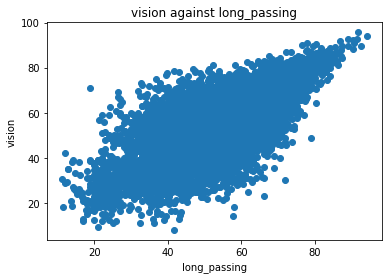

In [17]:
show_scatter('long_passing', 'vision')

#### This shows a strong positive correlation between vision and long_passing. It means a player with a good vision is likely going to be a good long passer of the ball.

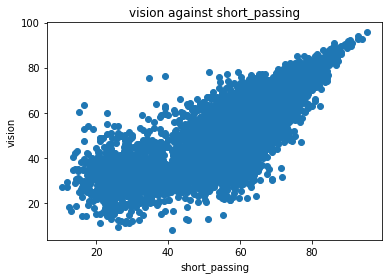

In [18]:
show_scatter('short_passing', 'vision')

#### This shows a strong positive correlation between vision and short_passing. It means a player with a good vision is likely going to be a good passer of the ball in close spaces.

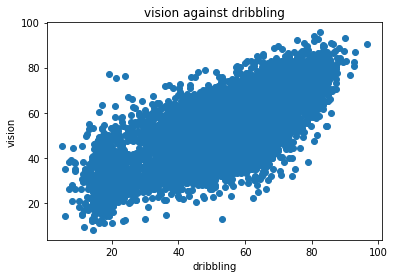

In [19]:
show_scatter('dribbling', 'vision')

#### This shows a strong positive correlation between vision and dribbling. It means a player with a good vision is likely going to be a good dribbler of the ball, and a flair player.

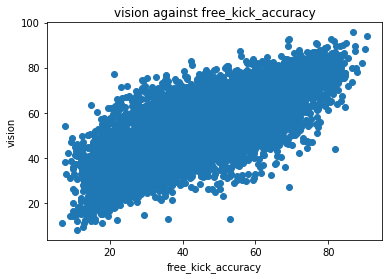

In [20]:
show_scatter('free_kick_accuracy', 'vision')

#### This shows a strong positive correlation between vision and free kicks. It means a player with a good vision is likely going to be a good freekick taker.

### Research Question 2

#### Are the attributes heading accuracy, shot power, long shots and volleys related to the finishing of a player?

### Compute Statistics

#### Find the mean of the attributes of each player, related to their attacking prowess over the number of years represented for a player. The qualities 'shot_power', 'long_shots', 'volleys', 'heading_accuracy' and 'finishing' are attributes relating to a player's finishing ability. It is only right to aggregate their attributes across the years provided.

In [21]:
st_mean = pl_combined.groupby(['player_name'])['shot_power', 'long_shots', 'volleys', 'heading_accuracy', 'finishing'].mean()

st_mean.head()

,shot_power,long_shots,volleys,heading_accuracy,finishing
player_name,,,,,
Aaron Appindangoye,54.600000,34.600000,43.600000,70.600000,43.600000
Aaron Cresswell,65.909091,54.121212,29.151515,52.939394,49.454545
Aaron Doran,62.807692,58.038462,54.269231,58.692308,57.923077
Aaron Galindo,64.869565,31.304348,47.782609,69.260870,26.260870
Aaron Hughes,47.080000,24.280000,32.080000,73.040000,38.840000


### Create visualizations

#### Plot the relationships between finishing and the other variables


#### Create a function for the scatter plot. This is because a scatter plot is used for 2d exploration.

In [22]:
def st_scatter(var1, var2):
    
    plt.scatter(x = st_mean[var1], y = [st_mean[var2]])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'{var2} against {var1}')

#### A good finisher's attacking prowess is based on the attributes of their finishing, long shorts, volleys, shot power and heading accuracy. So, scatter plots will be made to compare the correlation between the finishing attribute and other attacking attributes.

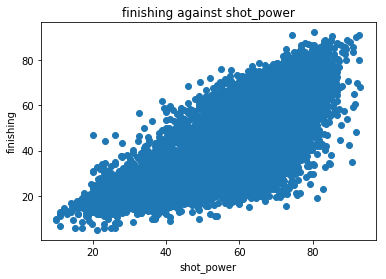

In [23]:
st_scatter('shot_power', 'finishing')

#### This shows a strong positive correlation between finishing and shot power. It means a player with a good finishing is likely going to have a high shot power.

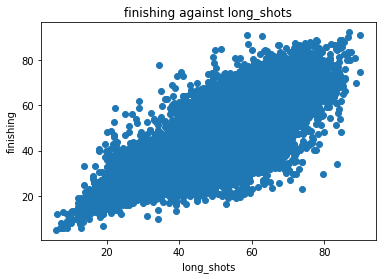

In [24]:
st_scatter('long_shots', 'finishing')

#### This shows a strong positive correlation between finishing and long shots. It means a player with a good finishing is likely going to be able to shoot from long range.

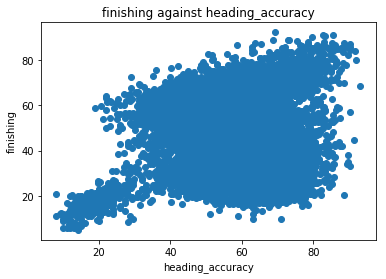

In [25]:
st_scatter('heading_accuracy', 'finishing')

#### This shows a strong positive correlation between finishing and heading accuracy. Only that this heading accuracy plot shows a wider spread of the plots, though still positively correlated.

#### This is most likely because heading accuracy is not just an attribute of strikers, but also defenders. Hence a defender can most likely have a good heading accuracy, yet it is not for finishing, and it is instead for defensive clearances (though defenders still head the ball for finishing from set pieces). You will see this from the plot above, that there are a good number of players with high heading accuracy, yet relatively low finishing.

#### Because of the strong positive correlation, we can still say a player with a good finishing is likely going to be a good header of the ball.

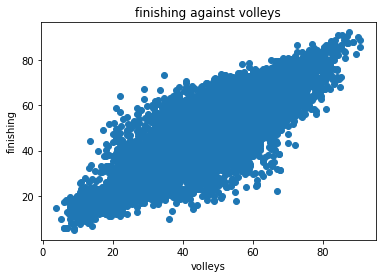

In [26]:
st_scatter('volleys', 'finishing')

#### This shows a strong positive correlation between finishing and volleys. Volleys are usually about the technique, which is an important attribute of attackers. This plot means a player with a good finishing is likely going to be able to have the technique to take volleys.

### Research Question 3

### Is the overall rating of all the players normally distributed?

#### First, extract the mean and standard deviation of overall rating, because these are important statistics to decide on normal distribution.

In [27]:
or_mean = pl_combined['overall_rating'].mean()

or_mean

68.600015288683096

In [28]:
or_std = pl_combined['overall_rating'].std()

or_std

7.0411394817953088

#### Create a function to draw the histogram to show normal distribution. This is because a histogram is a good way to represent normal distribution.

In [29]:
def draw_hist(data, x_label, y_label, p_title, figsize = (16,16)):
    data.hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(p_title)

#### Draw histogram

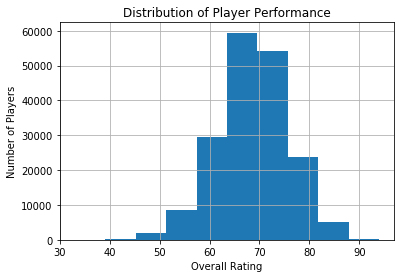

In [30]:
draw_hist(pl_combined['overall_rating'], 'Overall Rating', 'Number of Players', 'Distribution of Player Performance')


#### From the histogram above, there is a good normal distribution around the mean (68.60), and the relative distance of the ratings from the mean, which is representative of the standard deviation (7.04), are within reasonable range. Hence the data gives a reasonable representation of real life scenarios of ratings in the soccer profession since the histogram is relatively normally distributed.

## Conclusions

### Research Question 1

#### 1. How does the vision attribute of a creative playmaker correlate with his other playmaking attributes dribbling, free_kick_accuracy, long passing, and short passing? (A creative playmaker is known for their vision, long passing, dribbling, short passing and freekick accuracy)

From the scatter plots that showed the relationships between the vision attribute of a player and other attributes like long passing, shot passing, dribbling and free kick accuracy, we see a strong positive correlation between them. This shows that the attribute vision which is an important playmaking attribute in real life scenarios, will be a successful variable alongside the other attributes like long passing, shot passing, dribbling and free kick accuracy in determining whether or not a player has good playmaking skills.

Predictive analysis can be brought in as further research. Here, all the attributes plotted against vision in the scatter plot can be aggregated for each player, and this can be used to get another scatter plot. With a trend line from the scatter plot, both vision and the aggregated attributes of a playmaker can be determined.

One limitation to this data analysis is however the inability to know the positions that the players play, so as to accurately peg some of these analysis to certain players, especially midfielders and forwards.

### Research Question 2

#### 2. Are the attributes heading accuracy, shot power, long shots and volleys related to the finishing of a player?

Judging from the scatter plots that showed the relationships between the finishing attribute of a player and other attributes like shot power, volleys, long shots and heading accuracy, we see a strong positive correlation between them. Only the heading accuracy plot shows a wider spread of the plots, though still positively correlated.

This is most likely because heading accuracy is not just an attribute of strikers, but also defenders. Hence a defender can most likely have a good heading accuracy, yet it is not for finishing, and it is instead for defensive clearances(though defenders still head the ball for finishing from set pieces). So while a defender may be able to head the ball well, he may not be a good finisher. We are however limited in the data we have here, as we cannot ascertain the position of each player to accurately make this claim. 

The strong correlations between the finishing attribute and the other variables show that the attribute finishing can be said to have a strong positive relationship with shot power, long shots, volleys and heading accuracy.

Predictive analysis can be brought in as further research. Here, all the attributes plotted against finishing in the scatter plot can be aggregated for each player (maybe heading accuracy not included), and this can be used to get another scatter plot. With a trend line from the scatter plot, both finishing and the aggregated striking attributes of a player can be determined.

One limitation to this data analysis again is the inabilty to know the positions that the players play, so as to accurately peg some of these analysis to certain players, especially defenders, midfielders and forwards.

### Research Question 3


#### 3. Is the overall rating of all the players normally distributed?

Yes, the overall ratings of the players are normally distributed.

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

As with any probability distribution, the normal distribution describes how the values of a variable are distributed.
It is the most important probability distribution in statistics because it accurately describes the distribution of values for many natural phenomena. (definition gotten from the internet).

The mean and standard deviation of overall ratings were obtained in our exploratory data analysis section, and alongside the histogram ploted, we can agree that the data on overall rating is normally distributed.

There is a good normal distribution around the mean, and the relative distance of the ratings from the mean, which is representative of the standard deviation, are within reasonable range. Hence the data gives a reasonable representation of real life scenarios of ratings in the soccer profession.


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0